# PitViper Notebook Report

Ce notebook a été généré automatiquement par l'outil PitViper.

Il peut être utilisé de deux manières :

1. En utilisant les fonctions déjà crées et présentes dans les cellules suivantes.

2. En créant de nouvelles cellules et en y écrivant du code python3.

Les graphiques sont générés à l'aide de la bibliothèque python [Altair](https://altair-viz.github.io/index.html). Il est possible de télécharger chaque graphique au format SVG depuis le menu déroulant présent en haut à droite de chaque graphique.

La cellule suivante permet d'appeler les fonctions déjà crées pour la visualisation des résultats.

In [1]:
import sys
import os


modules_path = ['workflow/notebooks/', "../../../workflow/notebooks/"]
for module in modules_path:
    module_path = os.path.abspath(os.path.join(module))
    if module_path not in sys.path:
        sys.path.append(module_path)


from functions_pitviper_nb import * 

import time

alt.renderers.enable('html')

# For Snakemake
switch = True
while os.path.basename(os.getcwd()) != "PitViper":
    if switch:
        switch = False
        %cd ../../
    else:
        %cd ../

print('Working directory: ', os.getcwd())

/media/paularthur/data/Projets/Screens/PitViper/PitViper
Working directory:  /media/paularthur/data/Projets/Screens/PitViper/PitViper


Lors de la création automatique du rapport, les deux cellule suivante sont utilisées pour définir les dossiers contenant les résultats des différents outils utilisés.

Il est recommandé de ne pas les modifier.

In [2]:
# Parameters
mageck_mle_outputs = "results/shRNA/MAGeCK_MLE/"
mageck_rra_outputs = "results/shRNA/MAGeCK_RRA/"
bagel_outputs = "results/shRNA/BAGEL/"
crisphiermix_outputs = "results/shRNA/CRISPhieRmix/"

In [3]:
results_paths = [mageck_mle_outputs, mageck_rra_outputs, bagel_outputs, crisphiermix_outputs]

def configuration(results_paths):
    
    results_path_to_use = []
    for path in results_paths:
        if os.path.exists(path):
            results_path_to_use.append(path)
    return results_path_to_use

results = create_results_pitviper(configuration(results_paths))

## Quality Control

In [4]:
show_mapping_qc('CRISPRi_countFrom_bam')

No mapping QC file to show.


0

In [5]:
show_read_count_distribution('CRISPRi_countFrom_bam', width=500, height=250)

No count fileto show.


0

In [6]:
# gene_selection_table(results)

In [7]:
test_plotting(results['MAGeCK_MLE'], width=500, height=250)

interactive(children=(Dropdown(description='baseline', options=('M07e-J18', 'M07e-J11', 'M07e-J4'), value='M07…

La fonction `sgRNA_accross_conditions` permet de visualiser l'évolution du score des sgRNAs prédit par l'outil MAGeCK d'une *feature* d'intérêt dans une condition donnée.

In [8]:
sgRNA_accross_conditions(results['MAGeCK_RRA'], width=500, height=250)

interactive(children=(Text(value='', description='Feature:', placeholder='Feature to show...'), Dropdown(descr…

## Gene essentiality analysis

Les fonctions suivantes permettent de visualiser l'évolution du score des `features` pour chaque outil.

### MAGeCK MLE - Feature accross conditions

In [9]:
feature_accros_conditions(results['MAGeCK_MLE'])

interactive(children=(Dropdown(description='baseline', options=('M07e-J18', 'M07e-J11', 'M07e-J4'), value='M07…

### MAGeCK RRA - Feature accross conditions

In [10]:
feature_accros_conditions(results['MAGeCK_RRA'])

interactive(children=(Dropdown(description='baseline', options=('M07e-J18', 'M07e-J11', 'M07e-J4'), value='M07…

### CRISPhieRmix - Feature accross conditions

In [11]:
feature_accros_conditions(results['CRISPhieRmix'])

interactive(children=(Dropdown(description='baseline', options=('M07e-J18', 'M07e-J11', 'M07e-J4'), value='M07…

### BAGEL - Feature accross conditions

In [12]:
feature_accros_conditions(results['BAGEL'])

interactive(children=(Dropdown(description='baseline', options=('M07e-J18', 'M07e-J11', 'M07e-J4'), value='M07…

## Annotations

### EnrichR

In [13]:
enrichr_plots(results)

interactive(children=(Dropdown(description='tool', options=('MAGeCK_MLE', 'MAGeCK_RRA', 'BAGEL', 'CRISPhieRmix…

In [14]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import matplotlib as figure

def pca(token):
    path_qc = "./data/{token}/screen.count.txt".format(token=token)
    table = pd.read_csv(path_qc, sep='\t')
        
    table.iloc[:, 2:] = table.iloc[:, 2:] +1 
    table.iloc[:, 2:] = table.iloc[:, 2:].apply(np.log2)

    features = list(table.columns[2:])
    
    x = table.loc[:, features].values
    
    x = StandardScaler().fit_transform(x)
    
    pca = PCA(n_components=2)

    principalComponents = pca.fit_transform(x)

    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    
#     fig = plt.figure.Figure(figsize = (8,8))
#     ax = fig.add_subplot(1,1,1)
#     fig = ax.scatter(principalDf)

    return principalDf

    
pca('CRISPRi_countFrom_bam')

,principal component 1,principal component 2
0,-1.726843,-0.291542
1,-6.779774,-0.201359
2,2.710999,-0.060509
3,0.397749,0.282131
4,0.492596,-0.043351
...,...,...
7451,-9.847964,0.085482
7452,-9.847964,0.085482
7453,-9.847964,0.085482
7454,-9.847964,0.085482


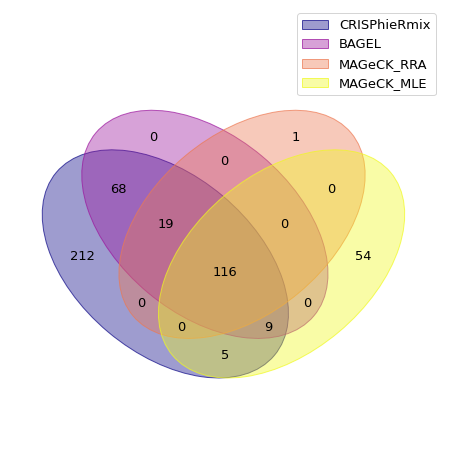

In [15]:
from venn import venn


baseline = "M07e-J4"
treatment = "M07e-J25"

condition = treatment + "_vs_" + baseline
fdr_col = treatment + "|fdr"

fdr_cutoff = 0.05


### MAGeCK MLE
mle_table = results['MAGeCK_MLE'].comparisons_dict[condition]['table'].copy()

mle_table.loc[mle_table[fdr_col] < fdr_cutoff, 'essential'] = True
mle_table.loc[mle_table[fdr_col] >= fdr_cutoff, 'essential'] = False
mle_table['tool'] = 'MAGeCK_MLE'

mle_table = mle_table[["Gene", "essential", "tool"]]

mle_table.head()


### MAGeCK RRA
rra_table = results['MAGeCK_RRA'].comparisons_dict[condition]['table'].copy()

rra_table

rra_table.loc[rra_table["neg|fdr"] < fdr_cutoff, 'essential'] = True
rra_table.loc[rra_table["neg|fdr"] >= fdr_cutoff, 'essential'] = False
rra_table['tool'] = 'MAGeCK_RRA'

rra_table = rra_table[["id", "essential", "tool"]]

rra_table.rename(columns={'id':'Gene'}, inplace=True)

rra_table.head()


### MAGeCK RRA
bagel_table = results['BAGEL'].comparisons_dict[condition]['table'].copy()

bagel_table.loc[bagel_table["BF"] > 0, 'essential'] = True
bagel_table.loc[bagel_table["BF"] < 0, 'essential'] = False
bagel_table['tool'] = 'BAGEL'

bagel_table = bagel_table[["GENE", "essential", "tool"]]

bagel_table.rename(columns={'GENE':'Gene'}, inplace=True)

bagel_table.head()


### CRISPhieRmix
crm_table = results['CRISPhieRmix'].comparisons_dict[condition]['table'].copy()

crm_table.loc[crm_table["locfdr"] < 0.05, 'essential'] = True
crm_table.loc[crm_table["locfdr"] >= 0.05, 'essential'] = False
crm_table['tool'] = 'CRISPhieRmix'

crm_table = crm_table[["gene", "essential", "tool"]]

crm_table.rename(columns={'gene':'Gene'}, inplace=True)

crm_table.head()


### Intégration

integration =  pd.concat([mle_table, rra_table, bagel_table, crm_table])

integration.head()

# print('\n > Genes by tool:')
# print(integration['tool'].value_counts())

# print('\n >MAGeCK MLE essentials genes:')
# print(integration.loc[integration['tool'] == 'MAGeCK_MLE']['essential'].value_counts())

# print('\n >MAGeCK RRA essentials genes:')
# print(integration.loc[integration['tool'] == 'MAGeCK_RRA']['essential'].value_counts())

# print('\n >BAGEL essentials genes:')
# print(integration.loc[integration['tool'] == 'BAGEL']['essential'].value_counts())

# print('\n >CRISPhieRmix essentials genes:')
# print(integration.loc[integration['tool'] == 'CRISPhieRmix']['essential'].value_counts())

integration_pivot = integration.pivot(index = "Gene", columns = 'tool', values = 'essential').reset_index()
# integration_pivot.drop("tool",axis=1,inplace=True)

def select_genes(integration, mode = "all", tools=["BAGEL", "CRISPhieRmix", "MAGeCK_MLE", "MAGeCK_RRA"]):
    if mode == "all":
        integration['test'] = integration[tools].all(axis='columns')
    if mode == "any":
        integration['test'] = integration[tools].any(axis='columns')
    return integration.loc[integration['test'] == True]['Gene'].values
    
    
cpm_genes = select_genes(integration_pivot, tools = ['CRISPhieRmix'])
bagel_genes = select_genes(integration_pivot, tools = ['BAGEL'])
rra_genes = select_genes(integration_pivot, tools = ['MAGeCK_RRA'])
mle_genes = select_genes(integration_pivot, tools = ['MAGeCK_MLE'])

d = {'CRISPhieRmix': set(cpm_genes),
     'BAGEL': set(bagel_genes),
     'MAGeCK_RRA': set(rra_genes),
     'MAGeCK_MLE': set(mle_genes)}

venn(d, cmap="plasma")

all_genes = select_genes(integration_pivot, mode = "any")

# print(len(all_genes))
# for gene in all_genes:
#     print(gene)